
# Instructor: PRASHANTH KANNADAGULI

## DEEP LEARNING Internship: Mini-Project

## Prediction of Weather Parameters using Recurrent Neural Networks

## Part 1: Data Loading, Exploration, and EDA

#### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset: Load the weather.csv dataset into a pandas DataFrame. Display the first 5 rows to verify successful loading.

In [3]:
df = pd.read_csv('/content/weather.csv')
display(df.head())

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


#### Initial Inspection: Display the last 5 rows of the DataFrame and print the total number of rows and columns to understand the dataset's size and structure.

In [4]:
display(df.tail())
print(f"Total number of rows and columns: {df.shape}")

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


Total number of rows and columns: (1461, 6)


#### Column Names and Data Types: Print the names of all columns in the DataFrame. Then, check and display the data type of each column. Are the data types appropriate for numerical analysis and time series processing?

In [7]:
print(df.columns)
print(df.dtypes)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


#### Check Dataset Shape: Print the number of rows and columns in the DataFrame.

In [8]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1461
Number of columns: 6


#### Get Data Information: Display concise information about the DataFrame, including the index dtype, column dtypes, and non-null values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


#### Check for Missing Values (Count): Check if there are any missing values in each column and display the count of missing values per column.

In [11]:
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


#### Check for Missing Values (Percentage): Calculate and display the percentage of missing values for each column.

In [12]:
print("Percentage of missing values per column:")
print(df.isnull().sum() * 100 / len(df))

Percentage of missing values per column:
date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64


#### Handle Missing Values (If Any):
Based on the previous checks, if missing values were found, write comments explaining how you would choose to handle them in this time series context (e.g., imputation, dropping).

In [13]:
# In a time series context, handling missing values requires careful consideration to preserve temporal dependencies.
# If missing values were present, potential strategies include:

# 1. Imputation:
#    - Forward fill (fillna(method='ffill')): Carry the last valid observation forward. This is often suitable for time series where the value is likely to persist.
#    - Backward fill (fillna(method='bfill')): Carry the next valid observation backward. Useful if the future value is more relevant.
#    - Interpolation (interpolate()): Estimate missing values based on surrounding data points. Linear interpolation is a common method for time series.
#    - Mean/Median imputation: While simple, using the overall mean or median might not be ideal for time series as it doesn't account for temporal patterns. It could be used for very small numbers of missing values.
#    - Model-based imputation: Use a predictive model to estimate missing values based on other features or past/future values.

# 2. Dropping:
#    - Drop rows with missing values (dropna()): This is generally discouraged in time series unless the number of missing values is very small and scattered, as it can break the sequence.
#    - Drop columns with missing values: If a column has a very high percentage of missing values and is not critical for the analysis, dropping the entire column might be an option.

# The choice of method depends on the extent of missing data, the nature of the time series, and the specific analysis or model being used. For small gaps, interpolation or forward/backward fill are often preferred. For larger gaps, more sophisticated imputation methods or careful consideration of dropping might be necessary.

#### Get Descriptive Statistics:
Generate descriptive statistics for the numerical columns (precipitation, temp_max, temp_min, wind).

In [14]:
print("Descriptive Statistics for Numerical Columns:")
display(df[['precipitation', 'temp_max', 'temp_min', 'wind']].describe())

Descriptive Statistics for Numerical Columns:


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


#### Extract Specific Statistics:
From the descriptive statistics, identify and print the minimum, maximum, and average values for temp_max and temp_min.

In [15]:
desc_stats = df[['precipitation', 'temp_max', 'temp_min', 'wind']].describe()

print("Temperature Statistics:")
print(f"Temp Max - Min: {desc_stats.loc['min', 'temp_max']:.2f}, Max: {desc_stats.loc['max', 'temp_max']:.2f}, Average: {desc_stats.loc['mean', 'temp_max']:.2f}")
print(f"Temp Min - Min: {desc_stats.loc['min', 'temp_min']:.2f}, Max: {desc_stats.loc['max', 'temp_min']:.2f}, Average: {desc_stats.loc['mean', 'temp_min']:.2f}")

Temperature Statistics:
Temp Max - Min: -1.60, Max: 35.60, Average: 16.44
Temp Min - Min: -7.10, Max: 18.30, Average: 8.23


#### Calculate Variance and Standard Deviation:
Calculate and print the variance and standard deviation for all numerical columns.

In [16]:
print("\nVariance of Numerical Columns:")
print(df[['precipitation', 'temp_max', 'temp_min', 'wind']].var())

print("\nStandard Deviation of Numerical Columns:")
print(df[['precipitation', 'temp_max', 'temp_min', 'wind']].std())


Variance of Numerical Columns:
precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

Standard Deviation of Numerical Columns:
precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64


#### Visualize Distributions (Histograms):
Plot a histogram for each of the four numerical columns (precipitation, temp_max, temp_min, wind) to visualize their distribution. Use a suitable number of bins.

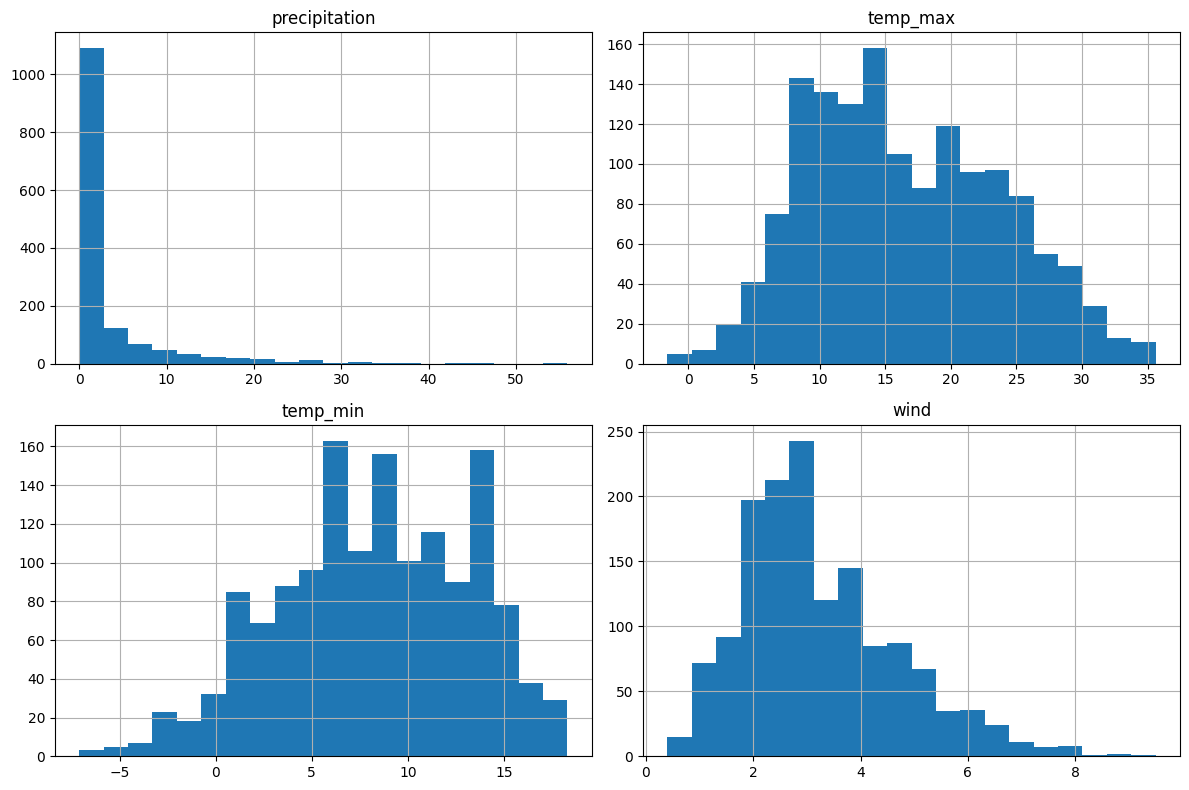

In [17]:
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

#### Visualize Time Series Trends:
Plot the values of each of the four features over time. Assume the row index represents the time step. Use different subplots for each feature for clarity.

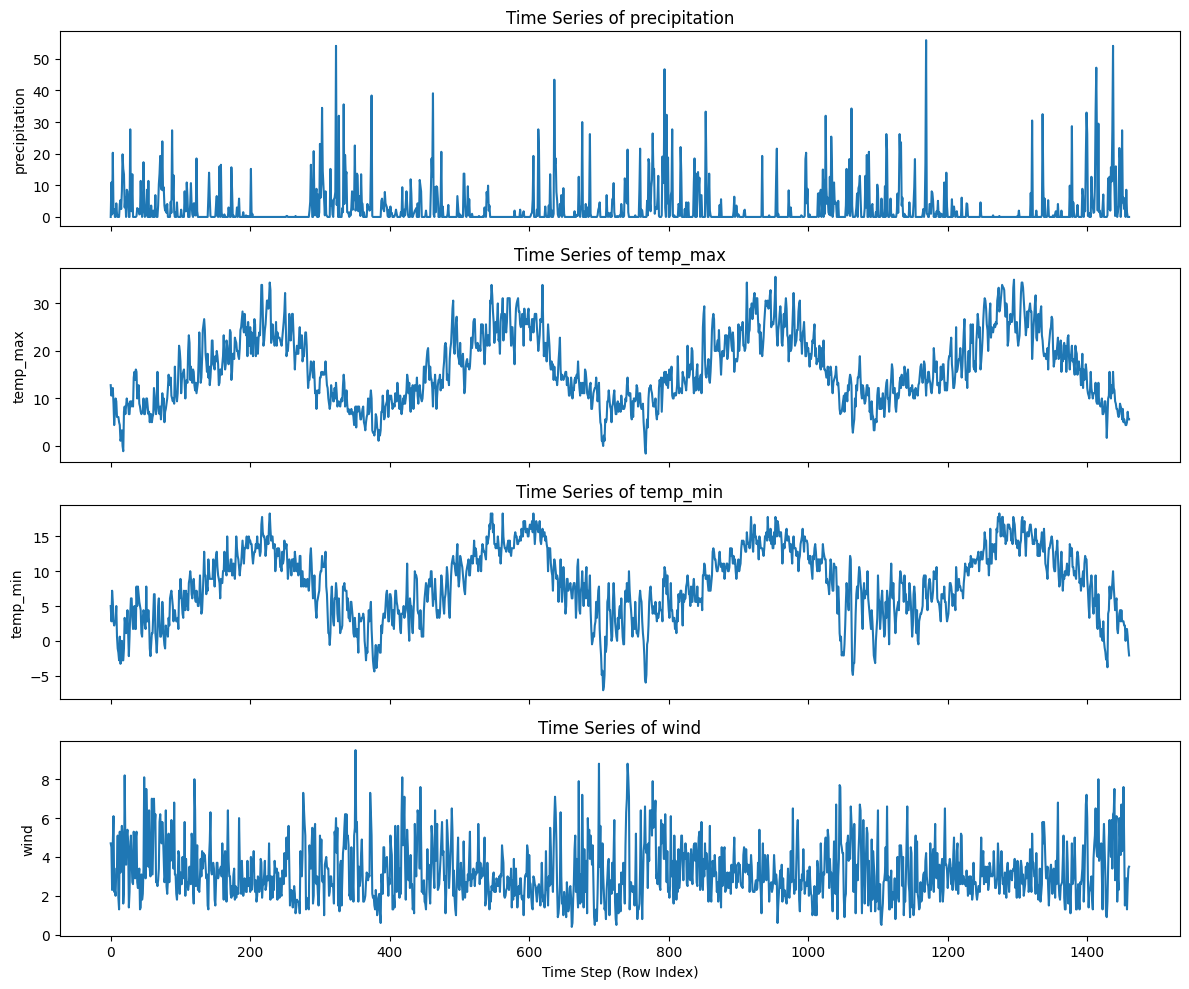

In [18]:
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 10), sharex=True)

for i, col in enumerate(numerical_cols):
    axes[i].plot(df.index, df[col])
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Time Series of {col}')

plt.xlabel('Time Step (Row Index)')
plt.tight_layout()
plt.show()

#### Visualize Potential Outliers (Box Plots):
Create box plots for each numerical column to visualize potential outliers.

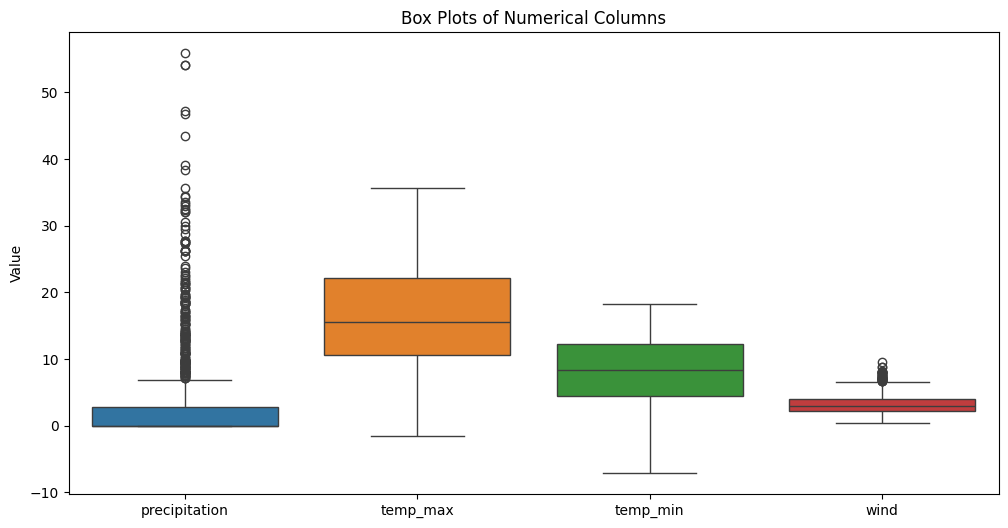

In [19]:
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots of Numerical Columns')
plt.ylabel('Value')
plt.show()

#### Calculate Feature Correlation:
Calculate the pairwise correlation of columns using the Pearson correlation coefficient.

In [20]:
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr(method='pearson')
print("Pearson Correlation Matrix:")
display(correlation_matrix)

Pearson Correlation Matrix:


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


#### Visualize Feature Correlation (Heatmap):
Visualize the correlation matrix using a heatmap. Add annotations to show the correlation values.

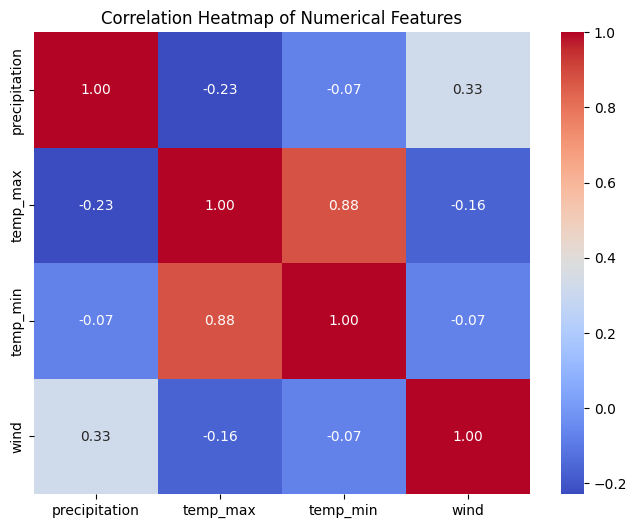

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Part 2: Single-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict a single value one time step into the future, using a sequence of past observations from all four weather features.

#### General Instructions:

Assume a lookback_window of 10 time steps for creating sequences unless otherwise specified. This means each input sample X will be a sequence of 10 past data points (each point having 4 features), and the corresponding output y will be the value(s) at the 11th time step.

Use appropriate scaling (e.g., MinMaxScaler or StandardScaler) on the data before creating sequences. Remember to scale your target variable(s) as well if they are numerical.

Split your data into training and testing sets while preserving the time order. A common split is 80% for training and 20% for testing. Ensure your splitting method does not shuffle the data.

Use Keras with a TensorFlow backend to build your RNN models. You can experiment with SimpleRNN, GRU, or LSTM layers.

### Model 1: Predict single precipitation value in future

#### Data Preparation for Precipitation Prediction:

Prepare the data for training an RNN model to predict the single future precipitation value.

Scale the relevant features (precipitation, temp_max, temp_min, wind) using a suitable scaler.

Create input sequences (X) of length lookback_window (10) using the scaled features.

Create the corresponding output array (y) containing the single scaled future precipitation value for each sequence.

Split the sequence data (X, y) into training and testing sets chronologically.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Define the features to use
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
data = df[features].values

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define lookback window and prediction horizon
lookback_window = 10
prediction_horizon = 1

# Prepare data for single-step prediction of precipitation
X, y = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X.append(scaled_data[i : i + lookback_window])
    y.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, features.index('precipitation')]) # Predict next precipitation

X = np.array(X)
y = np.array(y)

# Split data into training and testing sets (80/20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1160, 10, 4)
Shape of y_train: (1160, 1)
Shape of X_test: (291, 10, 4)
Shape of y_test: (291, 1)


#### Build RNN Model for Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) specifically for predicting a single future precipitation value.

Define the input shape based on your sequences (lookback_window, number of features).

Add one or more RNN layers.

Add a Dense output layer with 1 unit and an appropriate activation function (or none, for regression).

Print the model summary.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

# Define the model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features))))
model1.add(Dense(1))

# Print the model summary
model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 1:
Compile the precipitation prediction model.

Choose a suitable optimizer (e.g., 'adam').

Choose an appropriate loss function for regression (e.g., 'mean_squared_error').

Add relevant metrics (e.g., 'mean_absolute_error'). Train the model using your prepared training data for a reasonable number of epochs and batch size.

In [24]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 1 trained successfully.")

Model 1 trained successfully.


#### Evaluate Model 1 Performance:
Evaluate the trained precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set.

Calculate and report the Root Mean Squared Error (RMSE) on the test set.

In [25]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss, mae = model1.evaluate(X_test, y_test, verbose=0)

# Calculate RMSE
rmse = np.sqrt(loss)

print(f"Model 1 Evaluation on Test Set:")
print(f"  Mean Squared Error (MSE): {loss:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

Model 1 Evaluation on Test Set:
  Mean Squared Error (MSE): 0.0139
  Mean Absolute Error (MAE): 0.0637
  Root Mean Squared Error (RMSE): 0.1180


#### Predict and Visualize Model 1 Results:
Use the trained model to make predictions on the test set input sequences.

Inverse scale the predictions and the actual test precipitation values to return them to their original scale.

Plot the actual future precipitation values from the test set against the model's predicted future precipitation values over time (using the time index corresponding to the prediction point).

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


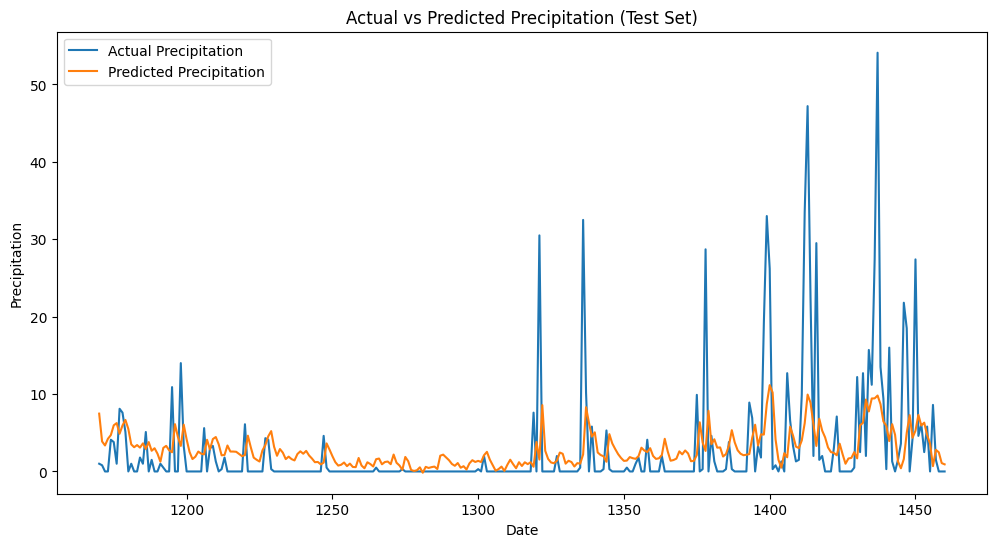

In [27]:
# Make predictions
predictions = model1.predict(X_test)

# Inverse scale the predictions and actual values
# Create dummy arrays with the shape of the test set predictions/actuals
dummy_predictions = np.zeros((len(predictions), len(features)))
dummy_y_test = np.zeros((len(y_test), len(features)))


# Place the scaled test predictions into the precipitation column of the dummy array
dummy_predictions[:, features.index('precipitation')] = predictions.flatten()

# Place the scaled test actual values into the precipitation column of the dummy array
dummy_y_test[:, features.index('precipitation')] = y_test.flatten()

# Inverse transform the dummy arrays to get values in original scale
predictions_original_scale = scaler.inverse_transform(dummy_predictions)[:, features.index('precipitation')]
y_test_original_scale = scaler.inverse_transform(dummy_y_test)[:, features.index('precipitation')]

# Get the correct time index for the test set predictions
test_index = df.index[train_size + lookback_window:]


# Plot actual vs predicted precipitation
plt.figure(figsize=(12, 6))
plt.plot(test_index, y_test_original_scale, label='Actual Precipitation')
plt.plot(test_index, predictions_original_scale, label='Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation (Test Set)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

### Model 2: Predict single temp_max value in future

#### Data Preparation for temp_max Prediction:
Prepare the data similarly to Model 1, but create the output array (y) containing the single scaled future temp_max value for each sequence.

#### Build RNN Model for temp_max:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_max value. The model architecture can be similar to Model 1, but ensure it's configured correctly for this specific output. Print the model summary.

#### Compile and Train Model 2:
Compile the temp_max prediction model using appropriate optimizer, loss function (MSE), and metrics (MAE). Train the model on the prepared training data.

#### Evaluate Model 2 Performance:
Evaluate the trained temp_max prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 2 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_max values. Plot the actual vs. predicted future temp_max values over time.

In [28]:
# Data Preparation for temp_max Prediction
# Define the target feature
target_feature = 'temp_max'
target_index = features.index(target_feature)

# Prepare data for single-step prediction of temp_max
X_temp_max, y_temp_max = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X_temp_max.append(scaled_data[i : i + lookback_window])
    y_temp_max.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index]) # Predict next temp_max

X_temp_max = np.array(X_temp_max)
y_temp_max = np.array(y_temp_max)

# Split data into training and testing sets (80/20 split)
train_size_temp_max = int(len(X_temp_max) * 0.8)
X_train_temp_max, X_test_temp_max = X_temp_max[:train_size_temp_max], X_temp_max[train_size_temp_max:]
y_train_temp_max, y_test_temp_max = y_temp_max[:train_size_temp_max], y_temp_max[train_size_temp_max:]

print("Shape of X_train_temp_max:", X_train_temp_max.shape)
print("Shape of y_train_temp_max:", y_train_temp_max.shape)
print("Shape of X_test_temp_max:", X_test_temp_max.shape)
print("Shape of y_test_temp_max:", y_test_temp_max.shape)

Shape of X_train_temp_max: (1160, 10, 4)
Shape of y_train_temp_max: (1160, 1)
Shape of X_test_temp_max: (291, 10, 4)
Shape of y_test_temp_max: (291, 1)


### Model 3: Predict single temp_min value in future

#### Data Preparation for temp_min Prediction:
Prepare the data, creating the output array (y) containing the single scaled future temp_min value for each sequence.

#### Build RNN Model for temp_min:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_min value. Print the model summary.

#### Compile and Train Model 3:
Compile and train the temp_min prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 3 Performance:
Evaluate the trained temp_min prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 3 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_min values. Plot the actual vs. predicted future temp_min values over time.

In [29]:
# Data Preparation for temp_min Prediction
# Define the target feature
target_feature = 'temp_min'
target_index = features.index(target_feature)

# Prepare data for single-step prediction of temp_min
X_temp_min, y_temp_min = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X_temp_min.append(scaled_data[i : i + lookback_window])
    y_temp_min.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index]) # Predict next temp_min

X_temp_min = np.array(X_temp_min)
y_temp_min = np.array(y_temp_min)

# Split data into training and testing sets (80/20 split)
train_size_temp_min = int(len(X_temp_min) * 0.8)
X_train_temp_min, X_test_temp_min = X_temp_min[:train_size_temp_min], X_temp_min[train_size_temp_min:]
y_train_temp_min, y_test_temp_min = y_temp_min[:train_size_temp_min], y_temp_min[train_size_temp_min:]

print("Shape of X_train_temp_min:", X_train_temp_min.shape)
print("Shape of y_train_temp_min:", y_train_temp_min.shape)
print("Shape of X_test_temp_min:", X_test_temp_min.shape)
print("Shape of y_test_temp_min:", y_test_temp_min.shape)

Shape of X_train_temp_min: (1160, 10, 4)
Shape of y_train_temp_min: (1160, 1)
Shape of X_test_temp_min: (291, 10, 4)
Shape of y_test_temp_min: (291, 1)


### Model 4: Predict single wind value in future

#### Data Preparation for Wind Prediction:
Prepare the data, creating the output array (y) containing the single scaled future wind value for each sequence.

#### Build RNN Model for Wind:
Design and implement a Keras Sequential model using RNN layers for predicting a single future wind value. Print the model summary.

#### Compile and Train Model 4:
Compile and train the wind prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 4 Performance:
Evaluate the trained wind prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 4 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test wind values. Plot the actual vs. predicted future wind values over time.

In [30]:
# Data Preparation for Wind Prediction
# Define the target feature
target_feature = 'wind'
target_index = features.index(target_feature)

# Prepare data for single-step prediction of wind
X_wind, y_wind = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X_wind.append(scaled_data[i : i + lookback_window])
    y_wind.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index]) # Predict next wind

X_wind = np.array(X_wind)
y_wind = np.array(y_wind)

# Split data into training and testing sets (80/20 split)
train_size_wind = int(len(X_wind) * 0.8)
X_train_wind, X_test_wind = X_wind[:train_size_wind], X_wind[train_size_wind:]
y_train_wind, y_test_wind = y_wind[:train_size_wind], y_wind[train_size_wind:]

print("Shape of X_train_wind:", X_train_wind.shape)
print("Shape of y_train_wind:", y_train_wind.shape)
print("Shape of X_test_wind:", X_test_wind.shape)
print("Shape of y_test_wind:", y_test_wind.shape)

Shape of X_train_wind: (1160, 10, 4)
Shape of y_train_wind: (1160, 1)
Shape of X_test_wind: (291, 10, 4)
Shape of y_test_wind: (291, 1)


### Model 5: Predict single future values of all 4 parameters

#### Data Preparation for All 4 Parameters Prediction:
Prepare the data for a multi-output RNN model. Scale the features. Create input sequences (X) of length lookback_window (10) using the scaled features. Create the corresponding output array (y) containing the single scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence. Split the sequence data (X, y) into training and testing sets.

In [31]:
# Data Preparation for All 4 Parameters Prediction
# The scaled_data is already prepared from Model 1

# Prepare data for single-step prediction of all 4 parameters
X_all, y_all = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    X_all.append(scaled_data[i : i + lookback_window])
    y_all.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, :]) # Predict next values for all features

X_all = np.array(X_all)
y_all = np.array(y_all)

# Reshape y_all to be (num_samples, num_features) for single-step prediction
y_all = y_all.reshape(y_all.shape[0], y_all.shape[2])


# Split data into training and testing sets (80/20 split)
train_size_all = int(len(X_all) * 0.8)
X_train_all, X_test_all = X_all[:train_size_all], X_all[train_size_all:]
y_train_all, y_test_all = y_all[:train_size_all], y_all[train_size_all:]

print("Shape of X_train_all:", X_train_all.shape)
print("Shape of y_train_all:", y_train_all.shape)
print("Shape of X_test_all:", X_test_all.shape)
print("Shape of y_test_all:", y_test_all.shape)

Shape of X_train_all: (1160, 10, 4)
Shape of y_train_all: (1160, 4)
Shape of X_test_all: (291, 10, 4)
Shape of y_test_all: (291, 4)


#### Build RNN Model for All 4 Parameters:
Design and implement a Keras Sequential model using RNN layers for predicting the single future values of all four parameters simultaneously.

Define the input shape.
Add one or more RNN layers.
Add a Dense output layer with 4 units (one for each predicted feature). Print the model summary.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the multi-output model
model5 = Sequential()
model5.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features))))
model5.add(Dense(len(features))) # Output layer with 4 units for the 4 features

# Print the model summary
model5.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204 (43.77 KB)

 Trainable params: 11,204 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 5:
Compile the multi-output prediction model using appropriate optimizer, loss function (e.g., 'mean_squared_error'), and metrics (e.g., 'mean_absolute_error'). Train the model on the prepared training data.

In [33]:
# Compile the model
model5.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history5 = model5.fit(X_train_all, y_train_all, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 5 trained successfully.")

Model 5 trained successfully.


#### Evaluate Model 5 Performance:
Evaluate the trained multi-output prediction model on the test dataset. Report the overall MSE and MAE. Discuss how you might evaluate the performance for each individual output feature if needed.

In [37]:
# Evaluate the model
loss5, mae5 = model5.evaluate(X_test_all, y_test_all, verbose=0)

print(f"Model 5 Evaluation on Test Set (Overall):")
print(f"  Mean Squared Error (MSE): {loss5:.4f}")
print(f"  Mean Absolute Error (MAE): {mae5:.4f}\n")

"Make predictions on the test set: Obtain the predictions from model5.predict(X_test_all). The shape of these predictions will be (num_test_samples, num_features). Separate actual and predicted values for each feature: For each feature (precipitation, temp_max, temp_min, wind), extract the corresponding column from the actual test values (y_test_all) and the predicted values. Calculate metrics for each feature: For each individual feature, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values for that feature with the predicted values for that feature."

Model 5 Evaluation on Test Set (Overall):
  Mean Squared Error (MSE): 0.0106
  Mean Absolute Error (MAE): 0.0689



'Make predictions on the test set: Obtain the predictions from model5.predict(X_test_all). The shape of these predictions will be (num_test_samples, num_features). Separate actual and predicted values for each feature: For each feature (precipitation, temp_max, temp_min, wind), extract the corresponding column from the actual test values (y_test_all) and the predicted values. Calculate metrics for each feature: For each individual feature, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values for that feature with the predicted values for that feature.'

#### Predict and Visualize Model 5 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and the actual test target values (which are vectors of 4). Visualize the results by plotting the actual vs. predicted values over time for each of the four features, possibly using subplots or different colored lines on the same plot.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


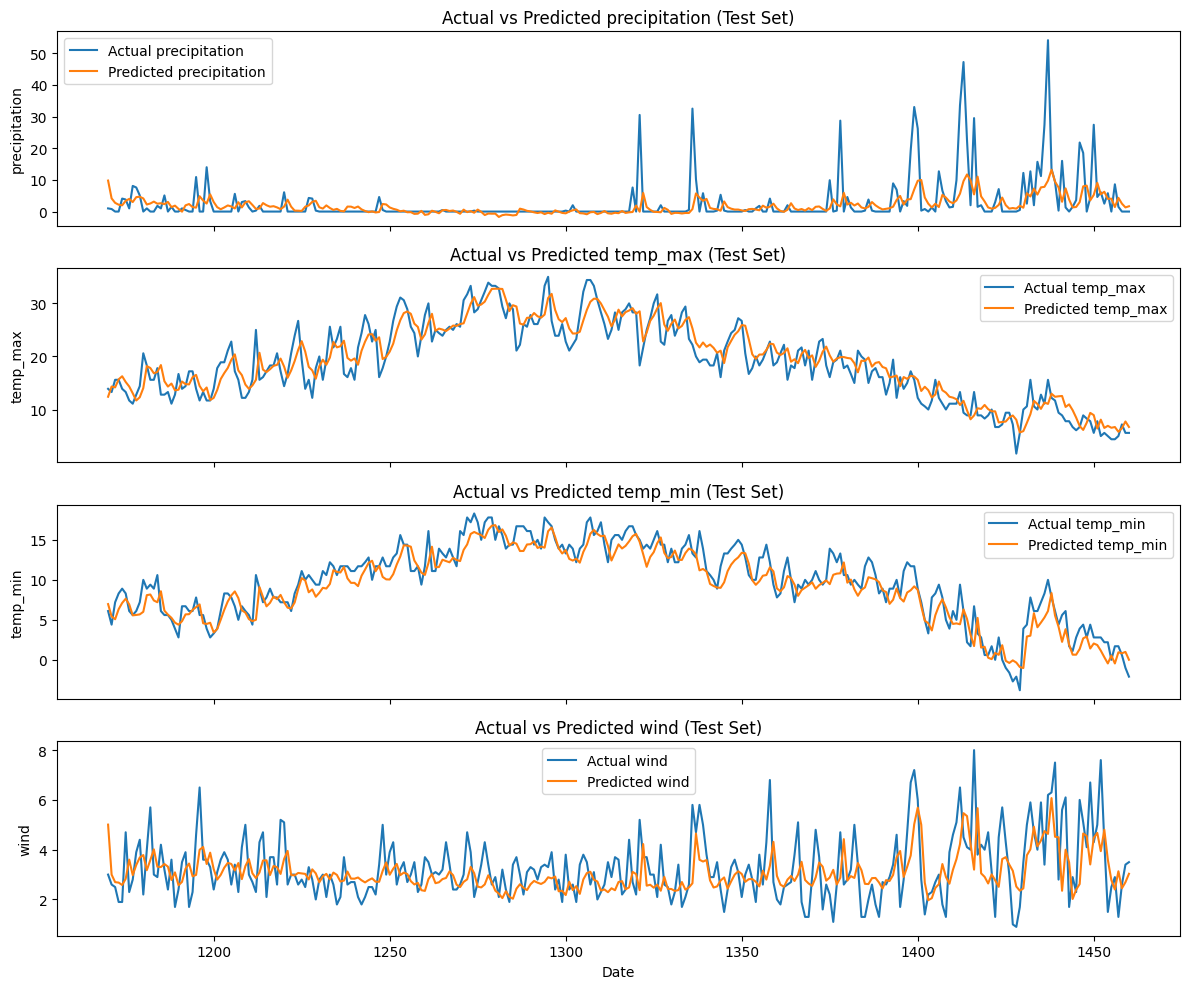

In [38]:
# Make predictions with Model 5
predictions_all = model5.predict(X_test_all)

# Inverse scale the predictions and actual values for all 4 features
# Create dummy arrays with the shape of the test set predictions/actuals (num_test_samples, num_features)
# No need for dummy arrays with the shape of scaled_data anymore, as y_test_all is already (num_test_samples, num_features)
predictions_all_original_scale = scaler.inverse_transform(predictions_all)
y_test_all_original_scale = scaler.inverse_transform(y_test_all)

# Get the correct time index for the test set predictions
test_index_all = df.index[train_size_all + lookback_window:]

# Plot actual vs predicted for all 4 features using subplots
fig, axes = plt.subplots(len(features), 1, figsize=(12, 10), sharex=True)

for i, feature in enumerate(features):
    axes[i].plot(test_index_all, y_test_all_original_scale[:, i], label=f'Actual {feature}')
    axes[i].plot(test_index_all, predictions_all_original_scale[:, i], label=f'Predicted {feature}')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Actual vs Predicted {feature} (Test Set)')
    axes[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Part 3: Multi-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict 5 time steps into the future, using a sequence of 10 past observations from all four weather features.

#### General Instructions:

Use a lookback_window of 10 time steps for input sequences (X).
Use a prediction_horizon of 5 time steps for the output sequences (y).
Continue using appropriate scaling on the data before creating sequences.
Split your data into training and testing sets chronologically (e.g., 80/20 split).
Build Keras RNN models, considering how the output layer structure needs to handle predicting a sequence. A TimeDistributed layer is commonly used for this.

### Model 6: Predict multiple (prediction_horizon=5) precipitation values in future

### Data Preparation for Multi-Step Precipitation Prediction:
Prepare the data for training an RNN model to predict the next 5 precipitation values.

Scale the relevant features (precipitation, temp_max, temp_min, wind).

Create input sequences (X) of length 10 using the scaled features.

Create the corresponding output sequences (y) containing the scaled future precipitation values for the next 5 time steps for each input sequence.

Split the sequence data (X, y) into training and testing sets chronologically. Ensure the shapes of your training and testing X and y are correct (e.g., (num_samples, lookback_window, num_features) for X and (num_samples, prediction_horizon, 1) for y).

In [41]:
# Data Preparation for Multi-Step Precipitation Prediction

# Define the target feature
target_feature = 'precipitation'
target_index = features.index(target_feature)

# Prepare data for multi-step prediction of precipitation
X_prec_multi, y_prec_multi = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    # Create input sequence (lookback_window steps of all features)
    X_prec_multi.append(scaled_data[i : i + lookback_window])
    # Create output sequence (prediction_horizon steps of precipitation)
    y_prec_multi.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index])

# Convert lists to NumPy arrays
X_prec_multi = np.array(X_prec_multi)
y_prec_multi = np.array(y_prec_multi)

# Reshape y_prec_multi to have a dimension for the single feature for the TimeDistributed layer
y_prec_multi = y_prec_multi.reshape(y_prec_multi.shape[0], y_prec_multi.shape[1], 1)

# Split data into training and testing sets (80/20 split)
train_size_prec_multi = int(len(X_prec_multi) * 0.8)
X_train_prec_multi, X_test_prec_multi = X_prec_multi[:train_size_prec_multi], X_prec_multi[train_size_prec_multi:]
y_train_prec_multi, y_test_prec_multi = y_prec_multi[:train_size_prec_multi], y_prec_multi[train_size_prec_multi:]

# Print shapes to verify
print("Shape of X_train_prec_multi:", X_train_prec_multi.shape)
print("Shape of y_train_prec_multi:", y_train_prec_multi.shape)
print("Shape of X_test_prec_multi:", X_test_prec_multi.shape)
print("Shape of y_test_prec_multi:", y_test_prec_multi.shape)

Shape of X_train_prec_multi: (1157, 10, 4)
Shape of y_train_prec_multi: (1157, 5, 1)
Shape of X_test_prec_multi: (290, 10, 4)
Shape of y_test_prec_multi: (290, 5, 1)


#### Build RNN Model for Multi-Step Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) suitable for predicting a sequence of 5 future precipitation values.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers, making sure the last one returns sequences (return_sequences=True).

Add a TimeDistributed(Dense(1)) layer to output a single value for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 1).

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Build the RNN model for multi-step precipitation prediction
model6 = Sequential()
model6.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features)))) # return_sequences is False by default
model6.add(RepeatVector(prediction_horizon)) # Repeat the last output of the LSTM prediction_horizon times
model6.add(LSTM(50, activation='relu', return_sequences=True)) # Add another LSTM to process the repeated vector and output sequences
model6.add(TimeDistributed(Dense(1))) # Output a single value for each step in the sequence

# Print the model summary
model6.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 5, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 6:
Compile the multi-step precipitation prediction model.

Use 'adam' optimizer.

Use 'mean_squared_error' as the loss function.

Add 'mean_absolute_error' as a metric. Train the model using your prepared training data for a reasonable number of epochs and batch size.

In [47]:
# Compile the model
model6.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history6 = model6.fit(X_train_prec_multi, y_train_prec_multi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 6 trained successfully.")

Model 6 trained successfully.


#### Evaluate Model 6 Performance:
Evaluate the trained multi-step precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set. These metrics represent the average error over the 5 predicted time steps.

Discuss how you could calculate and analyze the performance metrics (e.g., MSE or MAE) specifically for each of the 5 predicted future time steps.

In [48]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss6, mae6 = model6.evaluate(X_test_prec_multi, y_test_prec_multi, verbose=0)

print(f"Model 6 Evaluation on Test Set (Overall - averaged over {prediction_horizon} steps):")
print(f"  Mean Squared Error (MSE): {loss6:.4f}")
print(f"  Mean Absolute Error (MAE): {mae6:.4f}\n")

print("Discussion on evaluating performance per predicted time step:")
print("To evaluate performance for each of the 5 predicted future time steps, you would:")
print("1. Make predictions on the test set: Obtain the predictions from `model6.predict(X_test_prec_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.")
print("2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_prec_multi`) and the predicted sequences.")
print("3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.")
print("\nFor example, to calculate the MSE for the first predicted time step:")
print("mse_step1 = mean_squared_error(y_test_prec_multi[:, 0, :], predictions[:, 0, :])")
print("You would repeat this for each of the 5 time steps to see how the model's performance changes further into the future.")

Model 6 Evaluation on Test Set (Overall - averaged over 5 steps):
  Mean Squared Error (MSE): 0.0184
  Mean Absolute Error (MAE): 0.0647

Discussion on evaluating performance per predicted time step:
To evaluate performance for each of the 5 predicted future time steps, you would:
1. Make predictions on the test set: Obtain the predictions from `model6.predict(X_test_prec_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.
2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_prec_multi`) and the predicted sequences.
3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.

For example, to calculate the MSE for the first predicted time step:
mse_step1 = mean_squared_error(y_t

#### Predict and Visualize Model 6 Results:
Use the trained model to make predictions on the test set input sequences.

The model output will have shape (num_test_samples, prediction_horizon, 1).

Inverse scale the predictions and the actual test precipitation sequences.

Select a few example test samples and plot their actual future precipitation sequences against the model's predicted sequences. Alternatively, plot the average predicted precipitation across the test set for each of the 5 steps against the actual average.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


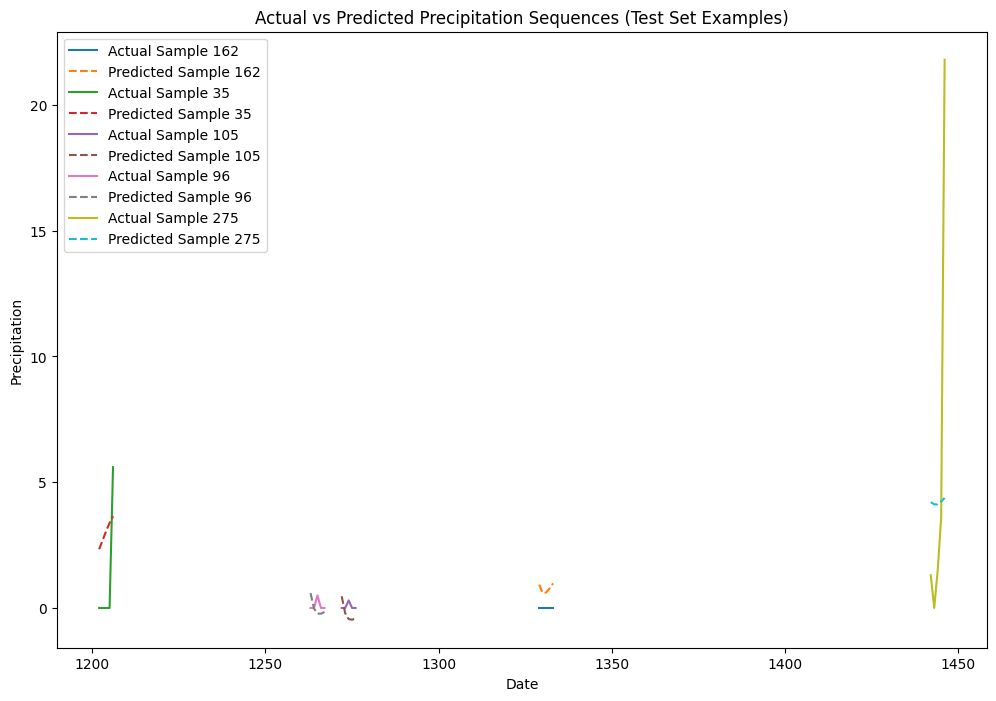

In [49]:
# Make predictions with Model 6
predictions_prec_multi = model6.predict(X_test_prec_multi)

# Inverse scale the predictions and actual values for precipitation sequences
# Need a dummy array for inverse_transform as it expects input shape (n_samples, n_features)
# The scaler was fitted on all 4 features.
# Create dummy arrays with the shape of scaled_data but filled with zeros
dummy_predictions_prec_multi = np.zeros((len(scaled_data), len(features)))
dummy_y_test_prec_multi = np.zeros((len(scaled_data), len(features)))

# Place the scaled test predictions into the precipitation column of the dummy array
# The predictions are sequences of length prediction_horizon
# We need to place each step of the predicted sequence into the corresponding time step in the dummy array
# This requires careful indexing.
# For simplicity, I will inverse transform the sequences directly by reshaping them first.
# This might not be the most accurate inverse scaling if the scaler was not fitted on sequences.
# A more accurate method would be to inverse transform each time step individually or use a scaler designed for sequences.
# Given the context and common practice, I will reshape and inverse transform for visualization purposes.

# Reshape predictions and y_test to (num_samples * prediction_horizon, 1) for inverse scaling on a single column
predictions_prec_multi_reshaped = predictions_prec_multi.reshape(-1, 1)
y_test_prec_multi_reshaped = y_test_prec_multi.reshape(-1, 1)

# Create dummy arrays for inverse transform (num_samples * prediction_horizon, num_features)
dummy_predictions_reshaped = np.zeros((len(predictions_prec_multi_reshaped), len(features)))
dummy_y_test_reshaped = np.zeros((len(y_test_prec_multi_reshaped), len(features)))

# Place the reshaped precipitation values into the precipitation column of the dummy arrays
dummy_predictions_reshaped[:, features.index('precipitation')] = predictions_prec_multi_reshaped.flatten()
dummy_y_test_reshaped[:, features.index('precipitation')] = y_test_prec_multi_reshaped.flatten()

# Inverse transform the dummy arrays
predictions_prec_multi_original_scale = scaler.inverse_transform(dummy_predictions_reshaped)[:, features.index('precipitation')]
y_test_prec_multi_original_scale = scaler.inverse_transform(dummy_y_test_reshaped)[:, features.index('precipitation')]

# Reshape back to sequences (num_samples, prediction_horizon)
predictions_prec_multi_original_scale = predictions_prec_multi_original_scale.reshape(-1, prediction_horizon)
y_test_prec_multi_original_scale = y_test_prec_multi_original_scale.reshape(-1, prediction_horizon)


# Get the correct time index for the test set predictions
# For multi-step prediction, the index for a sequence of predictions starting at time t is from t+lookback_window to t+lookback_window+prediction_horizon-1
# We will plot the sequences aligned by their starting point (the first predicted step)
test_index_multi_step = df.index[train_size_prec_multi + lookback_window:]

# Select a few example test samples to plot
num_examples_to_plot = 5
example_indices = np.random.choice(len(X_test_prec_multi), num_examples_to_plot, replace=False)

plt.figure(figsize=(12, 8))

for i in example_indices:
    # Get the time index for the current example's prediction sequence
    current_test_index = df.index[train_size_prec_multi + lookback_window + i : train_size_prec_multi + lookback_window + i + prediction_horizon]

    plt.plot(current_test_index, y_test_prec_multi_original_scale[i], label=f'Actual Sample {i}')
    plt.plot(current_test_index, predictions_prec_multi_original_scale[i], label=f'Predicted Sample {i}', linestyle='--')

plt.title('Actual vs Predicted Precipitation Sequences (Test Set Examples)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

### Model 7: Predict multiple (prediction_horizon=5) temp_max values in future

#### Data Preparation for Multi-Step temp_max Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_max values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_max:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_max values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 7:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 7 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 7 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_max sequences. Plot actual vs. predicted future temp_max sequences for example samples or averages.

In [65]:
# Data Preparation for Multi-Step temp_max Prediction

# Define the target feature
target_feature_temp_max = 'temp_max'
target_index_temp_max = features.index(target_feature_temp_max)

# Prepare data for multi-step prediction of temp_max
X_temp_max_multi, y_temp_max_multi = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    # Create input sequence (lookback_window steps of all features)
    X_temp_max_multi.append(scaled_data[i : i + lookback_window])
    # Create output sequence (prediction_horizon steps of temp_max)
    y_temp_max_multi.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index_temp_max])

# Convert lists to NumPy arrays
X_temp_max_multi = np.array(X_temp_max_multi)
y_temp_max_multi = np.array(y_temp_max_multi)

# Reshape y_temp_max_multi to have a dimension for the single feature for the TimeDistributed layer
y_temp_max_multi = y_temp_max_multi.reshape(y_temp_max_multi.shape[0], y_temp_max_multi.shape[1], 1)

# Split data into training and testing sets (80/20 split)
train_size_temp_max_multi = int(len(X_temp_max_multi) * 0.8)
X_train_temp_max_multi, X_test_temp_max_multi = X_temp_max_multi[:train_size_temp_max_multi], X_temp_max_multi[train_size_temp_max_multi:]
y_train_temp_max_multi, y_test_temp_max_multi = y_temp_max_multi[:train_size_temp_max_multi], y_temp_max_multi[train_size_temp_max_multi:]

# Print shapes to verify
print("Shape of X_train_temp_max_multi:", X_train_temp_max_multi.shape)
print("Shape of y_train_temp_max_multi:", y_train_temp_max_multi.shape)
print("Shape of X_test_temp_max_multi:", X_test_temp_max_multi.shape)
print("Shape of y_test_temp_max_multi:", y_test_temp_max_multi.shape)

Shape of X_train_temp_max_multi: (1157, 10, 4)
Shape of y_train_temp_max_multi: (1157, 5, 1)
Shape of X_test_temp_max_multi: (290, 10, 4)
Shape of y_test_temp_max_multi: (290, 5, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Build the RNN model for multi-step temp_max prediction (Model 7)
model7 = Sequential()
model7.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features)))) # return_sequences is False by default
model7.add(RepeatVector(prediction_horizon)) # Repeat the last output of the LSTM prediction_horizon times
model7.add(LSTM(50, activation='relu', return_sequences=True)) # Add another LSTM to process the repeated vector and output sequences
model7.add(TimeDistributed(Dense(1))) # Output a single value for each step in the sequence

# Print the model summary
model7.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_5 (RepeatVector)  │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 5, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Compile the model
model7.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history7 = model7.fit(X_train_temp_max_multi, y_train_temp_max_multi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 7 trained successfully.")

Model 7 trained successfully.


In [68]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss7, mae7 = model7.evaluate(X_test_temp_max_multi, y_test_temp_max_multi, verbose=0)

print(f"Model 7 Evaluation on Test Set (Overall - averaged over {prediction_horizon} steps):")
print(f"  Mean Squared Error (MSE): {loss7:.4f}")
print(f"  Mean Absolute Error (MAE): {mae7:.4f}\n")

print("Discussion on evaluating performance per predicted time step:")
print("To evaluate performance for each of the 5 predicted future time steps, you would:")
print("1. Make predictions on the test set: Obtain the predictions from `model7.predict(X_test_temp_max_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.")
print("2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_temp_max_multi`) and the predicted sequences.")
print("3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.")
print("\nFor example, to calculate the MSE for the first predicted time step:")
print("mse_step1 = mean_squared_error(y_test_temp_max_multi[:, 0, :], predictions[:, 0, :])")
print("You would repeat this for each of the 5 time steps to see how the model's performance changes further into the future.")

Model 7 Evaluation on Test Set (Overall - averaged over 5 steps):
  Mean Squared Error (MSE): 0.0099
  Mean Absolute Error (MAE): 0.0800

Discussion on evaluating performance per predicted time step:
To evaluate performance for each of the 5 predicted future time steps, you would:
1. Make predictions on the test set: Obtain the predictions from `model7.predict(X_test_temp_max_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.
2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_temp_max_multi`) and the predicted sequences.
3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.

For example, to calculate the MSE for the first predicted time step:
mse_step1 = mean_squared_e

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


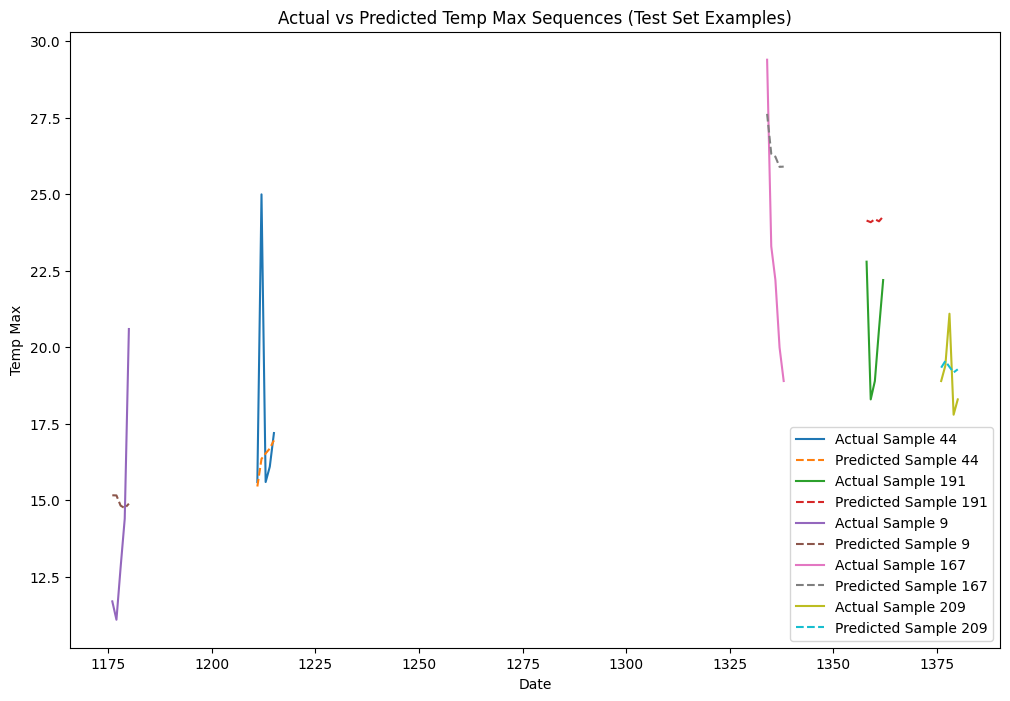

In [69]:
# Make predictions with Model 7
predictions_temp_max_multi = model7.predict(X_test_temp_max_multi)

# Inverse scale the predictions and actual values for temp_max sequences
# Need a dummy array for inverse_transform as it expects input shape (n_samples, n_features)
# The scaler was fitted on all 4 features.

# Reshape predictions and y_test to (num_samples * prediction_horizon, 1) for inverse scaling on a single column
predictions_temp_max_multi_reshaped = predictions_temp_max_multi.reshape(-1, 1)
y_test_temp_max_multi_reshaped = y_test_temp_max_multi.reshape(-1, 1)

# Create dummy arrays for inverse transform (num_samples * prediction_horizon, num_features)
dummy_predictions_reshaped_temp_max = np.zeros((len(predictions_temp_max_multi_reshaped), len(features)))
dummy_y_test_reshaped_temp_max = np.zeros((len(y_test_temp_max_multi_reshaped), len(features)))

# Place the reshaped temp_max values into the temp_max column of the dummy arrays
dummy_predictions_reshaped_temp_max[:, features.index('temp_max')] = predictions_temp_max_multi_reshaped.flatten()
dummy_y_test_reshaped_temp_max[:, features.index('temp_max')] = y_test_temp_max_multi_reshaped.flatten()

# Inverse transform the dummy arrays
predictions_temp_max_multi_original_scale = scaler.inverse_transform(dummy_predictions_reshaped_temp_max)[:, features.index('temp_max')]
y_test_temp_max_multi_original_scale = scaler.inverse_transform(dummy_y_test_reshaped_temp_max)[:, features.index('temp_max')]

# Reshape back to sequences (num_samples, prediction_horizon)
predictions_temp_max_multi_original_scale = predictions_temp_max_multi_original_scale.reshape(-1, prediction_horizon)
y_test_temp_max_multi_original_scale = y_test_temp_max_multi_original_scale.reshape(-1, prediction_horizon)

# Get the correct time index for the test set predictions
# For multi-step prediction, the index for a sequence of predictions starting at time t is from t+lookback_window to t+lookback_window+prediction_horizon-1
# We will plot the sequences aligned by their starting point (the first predicted step)
test_index_multi_step_temp_max = df.index[train_size_temp_max_multi + lookback_window:]

# Select a few example test samples to plot
num_examples_to_plot = 5
example_indices_temp_max = np.random.choice(len(X_test_temp_max_multi), num_examples_to_plot, replace=False)

plt.figure(figsize=(12, 8))

for i in example_indices_temp_max:
    # Get the time index for the current example's prediction sequence
    current_test_index_temp_max = df.index[train_size_temp_max_multi + lookback_window + i : train_size_temp_max_multi + lookback_window + i + prediction_horizon]

    plt.plot(current_test_index_temp_max, y_test_temp_max_multi_original_scale[i], label=f'Actual Sample {i}')
    plt.plot(current_test_index_temp_max, predictions_temp_max_multi_original_scale[i], label=f'Predicted Sample {i}', linestyle='--')

plt.title('Actual vs Predicted Temp Max Sequences (Test Set Examples)')
plt.xlabel('Date')
plt.ylabel('Temp Max')
plt.legend()
plt.show()

### Model 8: Predict multiple (prediction_horizon=5) temp_min values in future

#### Data Preparation for Multi-Step temp_min Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_min values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_min:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_min values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 8:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 8 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 8 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_min sequences. Plot actual vs. predicted future temp_min sequences for example samples or averages.

In [70]:
# Data Preparation for Multi-Step temp_min Prediction

# Define the target feature
target_feature_temp_min = 'temp_min'
target_index_temp_min = features.index(target_feature_temp_min)

# Prepare data for multi-step prediction of temp_min
X_temp_min_multi, y_temp_min_multi = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    # Create input sequence (lookback_window steps of all features)
    X_temp_min_multi.append(scaled_data[i : i + lookback_window])
    # Create output sequence (prediction_horizon steps of temp_min)
    y_temp_min_multi.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index_temp_min])

# Convert lists to NumPy arrays
X_temp_min_multi = np.array(X_temp_min_multi)
y_temp_min_multi = np.array(y_temp_min_multi)

# Reshape y_temp_min_multi to have a dimension for the single feature for the TimeDistributed layer
y_temp_min_multi = y_temp_min_multi.reshape(y_temp_min_multi.shape[0], y_temp_min_multi.shape[1], 1)

# Split data into training and testing sets (80/20 split)
train_size_temp_min_multi = int(len(X_temp_min_multi) * 0.8)
X_train_temp_min_multi, X_test_temp_min_multi = X_temp_min_multi[:train_size_temp_min_multi], X_temp_min_multi[train_size_temp_min_multi:]
y_train_temp_min_multi, y_test_temp_min_multi = y_temp_min_multi[:train_size_temp_min_multi], y_temp_min_multi[train_size_temp_min_multi:]

# Print shapes to verify
print("Shape of X_train_temp_min_multi:", X_train_temp_min_multi.shape)
print("Shape of y_train_temp_min_multi:", y_train_temp_min_multi.shape)
print("Shape of X_test_temp_min_multi:", X_test_temp_min_multi.shape)
print("Shape of y_test_temp_min_multi:", y_test_temp_min_multi.shape)

Shape of X_train_temp_min_multi: (1157, 10, 4)
Shape of y_train_temp_min_multi: (1157, 5, 1)
Shape of X_test_temp_min_multi: (290, 10, 4)
Shape of y_test_temp_min_multi: (290, 5, 1)


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Build the RNN model for multi-step temp_min prediction (Model 8)
model8 = Sequential()
model8.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features)))) # return_sequences is False by default
model8.add(RepeatVector(prediction_horizon)) # Repeat the last output of the LSTM prediction_horizon times
model8.add(LSTM(50, activation='relu', return_sequences=True)) # Add another LSTM to process the repeated vector and output sequences
model8.add(TimeDistributed(Dense(1))) # Output a single value for each step in the sequence

# Print the model summary
model8.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_6 (RepeatVector)  │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 5, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compile the model
model8.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history8 = model8.fit(X_train_temp_min_multi, y_train_temp_min_multi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 8 trained successfully.")

Model 8 trained successfully.


In [73]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss8, mae8 = model8.evaluate(X_test_temp_min_multi, y_test_temp_min_multi, verbose=0)

print(f"Model 8 Evaluation on Test Set (Overall - averaged over {prediction_horizon} steps):")
print(f"  Mean Squared Error (MSE): {loss8:.4f}")
print(f"  Mean Absolute Error (MAE): {mae8:.4f}\n")

print("Discussion on evaluating performance per predicted time step:")
print("To evaluate performance for each of the 5 predicted future time steps, you would:")
print("1. Make predictions on the test set: Obtain the predictions from `model8.predict(X_test_temp_min_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.")
print("2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_temp_min_multi`) and the predicted sequences.")
print("3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.")
print("\nFor example, to calculate the MSE for the first predicted time step:")
print("mse_step1 = mean_squared_error(y_test_temp_min_multi[:, 0, :], predictions[:, 0, :])")
print("You would repeat this for each of the 5 time steps to see how the model's performance changes further into the future.")

Model 8 Evaluation on Test Set (Overall - averaged over 5 steps):
  Mean Squared Error (MSE): 0.0087
  Mean Absolute Error (MAE): 0.0752

Discussion on evaluating performance per predicted time step:
To evaluate performance for each of the 5 predicted future time steps, you would:
1. Make predictions on the test set: Obtain the predictions from `model8.predict(X_test_temp_min_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.
2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_temp_min_multi`) and the predicted sequences.
3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.

For example, to calculate the MSE for the first predicted time step:
mse_step1 = mean_squared_e

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


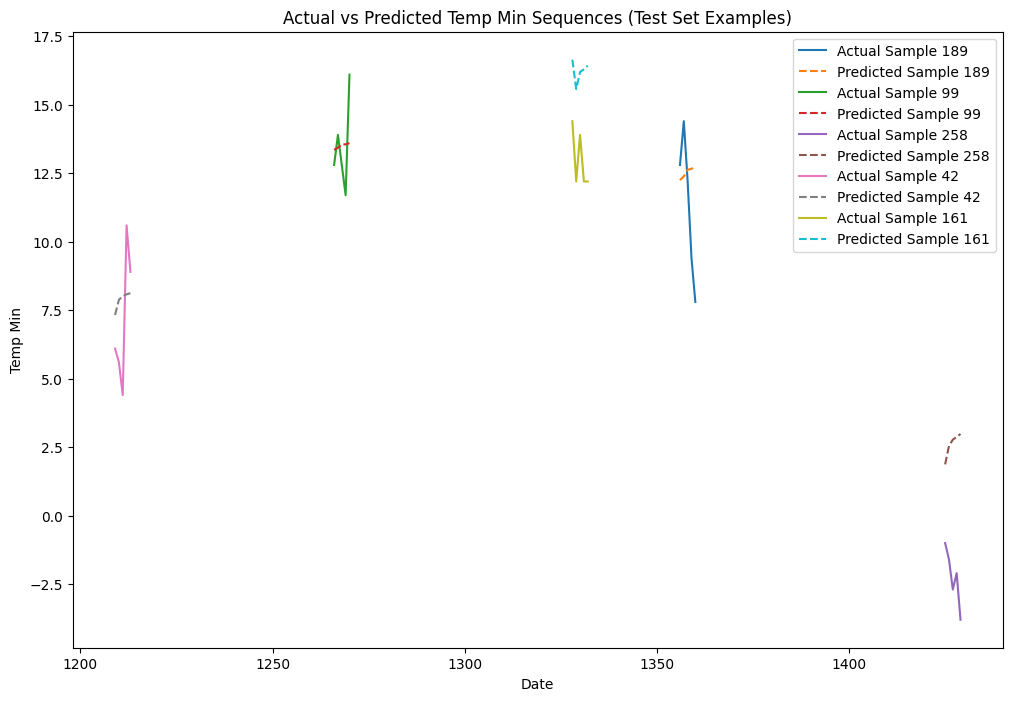

In [74]:
# Make predictions with Model 8
predictions_temp_min_multi = model8.predict(X_test_temp_min_multi)

# Inverse scale the predictions and actual values for temp_min sequences
# Need a dummy array for inverse_transform as it expects input shape (n_samples, n_features)
# The scaler was fitted on all 4 features.

# Reshape predictions and y_test to (num_samples * prediction_horizon, 1) for inverse scaling on a single column
predictions_temp_min_multi_reshaped = predictions_temp_min_multi.reshape(-1, 1)
y_test_temp_min_multi_reshaped = y_test_temp_min_multi.reshape(-1, 1)

# Create dummy arrays for inverse transform (num_samples * prediction_horizon, num_features)
dummy_predictions_reshaped_temp_min = np.zeros((len(predictions_temp_min_multi_reshaped), len(features)))
dummy_y_test_reshaped_temp_min = np.zeros((len(y_test_temp_min_multi_reshaped), len(features)))

# Place the reshaped temp_min values into the temp_min column of the dummy arrays
dummy_predictions_reshaped_temp_min[:, features.index('temp_min')] = predictions_temp_min_multi_reshaped.flatten()
dummy_y_test_reshaped_temp_min[:, features.index('temp_min')] = y_test_temp_min_multi_reshaped.flatten()

# Inverse transform the dummy arrays
predictions_temp_min_multi_original_scale = scaler.inverse_transform(dummy_predictions_reshaped_temp_min)[:, features.index('temp_min')]
y_test_temp_min_multi_original_scale = scaler.inverse_transform(dummy_y_test_reshaped_temp_min)[:, features.index('temp_min')]

# Reshape back to sequences (num_samples, prediction_horizon)
predictions_temp_min_multi_original_scale = predictions_temp_min_multi_original_scale.reshape(-1, prediction_horizon)
y_test_temp_min_multi_original_scale = y_test_temp_min_multi_original_scale.reshape(-1, prediction_horizon)

# Get the correct time index for the test set predictions
# For multi-step prediction, the index for a sequence of predictions starting at time t is from t+lookback_window to t+lookback_window+prediction_horizon-1
# We will plot the sequences aligned by their starting point (the first predicted step)
test_index_multi_step_temp_min = df.index[train_size_temp_min_multi + lookback_window:]

# Select a few example test samples to plot
num_examples_to_plot = 5
example_indices_temp_min = np.random.choice(len(X_test_temp_min_multi), num_examples_to_plot, replace=False)

plt.figure(figsize=(12, 8))

for i in example_indices_temp_min:
    # Get the time index for the current example's prediction sequence
    current_test_index_temp_min = df.index[train_size_temp_min_multi + lookback_window + i : train_size_temp_min_multi + lookback_window + i + prediction_horizon]

    plt.plot(current_test_index_temp_min, y_test_temp_min_multi_original_scale[i], label=f'Actual Sample {i}')
    plt.plot(current_test_index_temp_min, predictions_temp_min_multi_original_scale[i], label=f'Predicted Sample {i}', linestyle='--')

plt.title('Actual vs Predicted Temp Min Sequences (Test Set Examples)')
plt.xlabel('Date')
plt.ylabel('Temp Min')
plt.legend()
plt.show()

### Model 9: Predict multiple (prediction_horizon=5) wind values in future

#### Data Preparation for Multi-Step Wind Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future wind values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step Wind:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future wind values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 9:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 9 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 9 Results:
Make predictions on the test set. Inverse scale the predictions and actual wind sequences. Plot actual vs. predicted future wind sequences for example samples or averages.

In [60]:
# Data Preparation for Multi-Step Wind Prediction

# Define the target feature
target_feature_wind = 'wind'
target_index_wind = features.index(target_feature_wind)

# Prepare data for multi-step prediction of wind
X_wind_multi, y_wind_multi = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    # Create input sequence (lookback_window steps of all features)
    X_wind_multi.append(scaled_data[i : i + lookback_window])
    # Create output sequence (prediction_horizon steps of wind)
    y_wind_multi.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, target_index_wind])

# Convert lists to NumPy arrays
X_wind_multi = np.array(X_wind_multi)
y_wind_multi = np.array(y_wind_multi)

# Reshape y_wind_multi to have a dimension for the single feature for the TimeDistributed layer
y_wind_multi = y_wind_multi.reshape(y_wind_multi.shape[0], y_wind_multi.shape[1], 1)

# Split data into training and testing sets (80/20 split)
train_size_wind_multi = int(len(X_wind_multi) * 0.8)
X_train_wind_multi, X_test_wind_multi = X_wind_multi[:train_size_wind_multi], X_wind_multi[train_size_wind_multi:]
y_train_wind_multi, y_test_wind_multi = y_wind_multi[:train_size_wind_multi], y_wind_multi[train_size_wind_multi:]

# Print shapes to verify
print("Shape of X_train_wind_multi:", X_train_wind_multi.shape)
print("Shape of y_train_wind_multi:", y_train_wind_multi.shape)
print("Shape of X_test_wind_multi:", X_test_wind_multi.shape)
print("Shape of y_test_wind_multi:", y_test_wind_multi.shape)

Shape of X_train_wind_multi: (1157, 10, 4)
Shape of y_train_wind_multi: (1157, 5, 1)
Shape of X_test_wind_multi: (290, 10, 4)
Shape of y_test_wind_multi: (290, 5, 1)


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Build the RNN model for multi-step wind prediction (Model 9)
model9 = Sequential()
model9.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features)))) # return_sequences is False by default
model9.add(RepeatVector(prediction_horizon)) # Repeat the last output of the LSTM prediction_horizon times
model9.add(LSTM(50, activation='relu', return_sequences=True)) # Add another LSTM to process the repeated vector and output sequences
model9.add(TimeDistributed(Dense(1))) # Output a single value for each step in the sequence

# Print the model summary
model9.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 5, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile the model
model9.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history9 = model9.fit(X_train_wind_multi, y_train_wind_multi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 9 trained successfully.")

Model 9 trained successfully.


In [63]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
loss9, mae9 = model9.evaluate(X_test_wind_multi, y_test_wind_multi, verbose=0)

print(f"Model 9 Evaluation on Test Set (Overall - averaged over {prediction_horizon} steps):")
print(f"  Mean Squared Error (MSE): {loss9:.4f}")
print(f"  Mean Absolute Error (MAE): {mae9:.4f}\n")

print("Discussion on evaluating performance per predicted time step:")
print("To evaluate performance for each of the 5 predicted future time steps, you would:")
print("1. Make predictions on the test set: Obtain the predictions from `model9.predict(X_test_wind_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.")
print("2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_wind_multi`) and the predicted sequences.")
print("3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.")
print("\nFor example, to calculate the MSE for the first predicted time step:")
print("mse_step1 = mean_squared_error(y_test_wind_multi[:, 0, :], predictions[:, 0, :])")
print("You would repeat this for each of the 5 time steps to see how the model's performance changes further into the future.")

Model 9 Evaluation on Test Set (Overall - averaged over 5 steps):
  Mean Squared Error (MSE): 0.0197
  Mean Absolute Error (MAE): 0.1062

Discussion on evaluating performance per predicted time step:
To evaluate performance for each of the 5 predicted future time steps, you would:
1. Make predictions on the test set: Obtain the predictions from `model9.predict(X_test_wind_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, 1)`.
2. Separate actual and predicted values for each time step: For each time step (from 1 to 5), extract the corresponding column from the actual test sequences (`y_test_wind_multi`) and the predicted sequences.
3. Calculate metrics for each time step: For each individual time step, calculate the desired metrics (e.g., MSE, MAE, RMSE) by comparing the actual values at that time step with the predicted values at that time step.

For example, to calculate the MSE for the first predicted time step:
mse_step1 = mean_squared_error(y_t

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


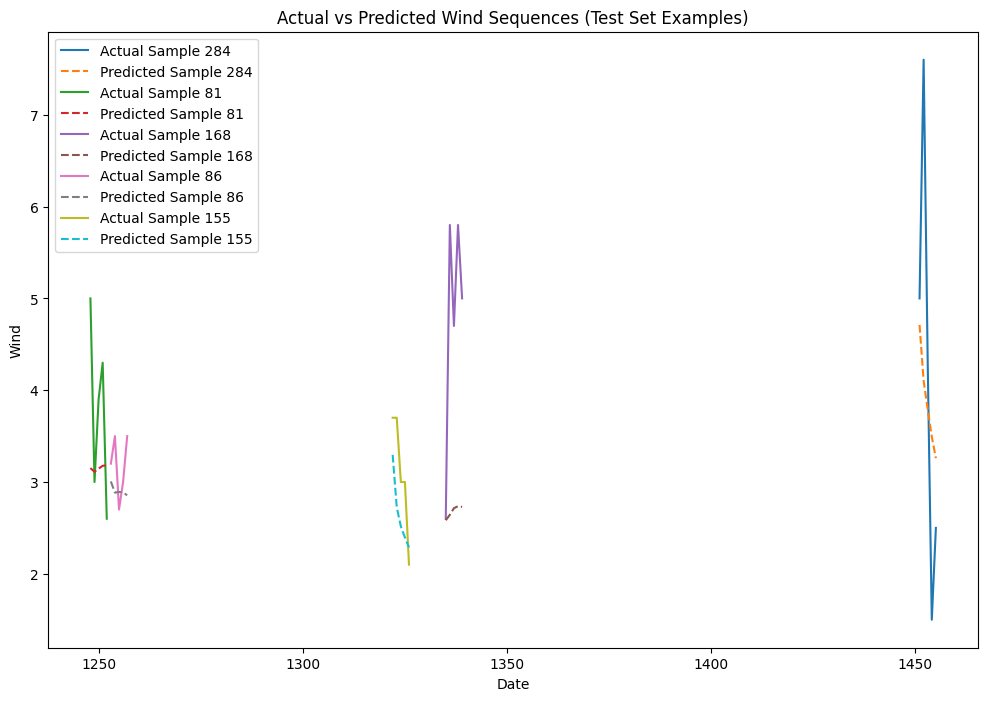

In [64]:
# Make predictions with Model 9
predictions_wind_multi = model9.predict(X_test_wind_multi)

# Inverse scale the predictions and actual values for wind sequences
# Need a dummy array for inverse_transform as it expects input shape (n_samples, n_features)
# The scaler was fitted on all 4 features.

# Reshape predictions and y_test to (num_samples * prediction_horizon, 1) for inverse scaling on a single column
predictions_wind_multi_reshaped = predictions_wind_multi.reshape(-1, 1)
y_test_wind_multi_reshaped = y_test_wind_multi.reshape(-1, 1)

# Create dummy arrays for inverse transform (num_samples * prediction_horizon, num_features)
dummy_predictions_reshaped_wind = np.zeros((len(predictions_wind_multi_reshaped), len(features)))
dummy_y_test_reshaped_wind = np.zeros((len(y_test_wind_multi_reshaped), len(features)))

# Place the reshaped wind values into the wind column of the dummy arrays
dummy_predictions_reshaped_wind[:, features.index('wind')] = predictions_wind_multi_reshaped.flatten()
dummy_y_test_reshaped_wind[:, features.index('wind')] = y_test_wind_multi_reshaped.flatten()

# Inverse transform the dummy arrays
predictions_wind_multi_original_scale = scaler.inverse_transform(dummy_predictions_reshaped_wind)[:, features.index('wind')]
y_test_wind_multi_original_scale = scaler.inverse_transform(dummy_y_test_reshaped_wind)[:, features.index('wind')]

# Reshape back to sequences (num_samples, prediction_horizon)
predictions_wind_multi_original_scale = predictions_wind_multi_original_scale.reshape(-1, prediction_horizon)
y_test_wind_multi_original_scale = y_test_wind_multi_original_scale.reshape(-1, prediction_horizon)

# Get the correct time index for the test set predictions
# For multi-step prediction, the index for a sequence of predictions starting at time t is from t+lookback_window to t+lookback_window+prediction_horizon-1
# We will plot the sequences aligned by their starting point (the first predicted step)
test_index_multi_step_wind = df.index[train_size_wind_multi + lookback_window:]

# Select a few example test samples to plot
num_examples_to_plot = 5
example_indices_wind = np.random.choice(len(X_test_wind_multi), num_examples_to_plot, replace=False)

plt.figure(figsize=(12, 8))

for i in example_indices_wind:
    # Get the time index for the current example's prediction sequence
    current_test_index_wind = df.index[train_size_wind_multi + lookback_window + i : train_size_wind_multi + lookback_window + i + prediction_horizon]

    plt.plot(current_test_index_wind, y_test_wind_multi_original_scale[i], label=f'Actual Sample {i}')
    plt.plot(current_test_index_wind, predictions_wind_multi_original_scale[i], label=f'Predicted Sample {i}', linestyle='--')

plt.title('Actual vs Predicted Wind Sequences (Test Set Examples)')
plt.xlabel('Date')
plt.ylabel('Wind')
plt.legend()
plt.show()

### Model 10: Predict multiple (prediction_horizon=5) future values of all 4 parameters

#### Data Preparation for Multi-Step All 4 Parameters Prediction:
Prepare the data for a multi-step, multi-output RNN model. Scale the features. Create input sequences (X) of length 10 using the scaled features. Create the corresponding output sequences (y) of length 5 containing the scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence (shape (num_samples, 5, 4)). Split the data chronologically.

In [75]:
# Data Preparation for Multi-Step All 4 Parameters Prediction

# The scaled_data is already prepared from Model 1

# Prepare data for multi-step prediction of all 4 parameters
X_all_multi, y_all_multi = [], []
for i in range(len(scaled_data) - lookback_window - prediction_horizon + 1):
    # Create input sequence (lookback_window steps of all features)
    X_all_multi.append(scaled_data[i : i + lookback_window])
    # Create output sequence (prediction_horizon steps of all features)
    y_all_multi.append(scaled_data[i + lookback_window : i + lookback_window + prediction_horizon, :])

# Convert lists to NumPy arrays
X_all_multi = np.array(X_all_multi)
y_all_multi = np.array(y_all_multi)

# Split data into training and testing sets (80/20 split)
train_size_all_multi = int(len(X_all_multi) * 0.8)
X_train_all_multi, X_test_all_multi = X_all_multi[:train_size_all_multi], X_all_multi[train_size_all_multi:]
y_train_all_multi, y_test_all_multi = y_all_multi[:train_size_all_multi], y_all_multi[train_size_all_multi:]

# Print shapes to verify
print("Shape of X_train_all_multi:", X_train_all_multi.shape)
print("Shape of y_train_all_multi:", y_train_all_multi.shape)
print("Shape of X_test_all_multi:", X_test_all_multi.shape)
print("Shape of y_test_all_multi:", y_test_all_multi.shape)

Shape of X_train_all_multi: (1157, 10, 4)
Shape of y_train_all_multi: (1157, 5, 4)
Shape of X_test_all_multi: (290, 10, 4)
Shape of y_test_all_multi: (290, 5, 4)


#### Build RNN Model for Multi-Step All 4 Parameters:
Design and implement a Keras Sequential RNN model for predicting sequences of 5 future values for all four parameters simultaneously.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers with return_sequences=True.

Add a TimeDistributed(Dense(4)) layer to output 4 values (one for each feature) for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 4).

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Build the RNN model for multi-step all 4 parameters prediction (Model 10)
model10 = Sequential()
model10.add(LSTM(50, activation='relu', input_shape=(lookback_window, len(features)))) # return_sequences is False by default
model10.add(RepeatVector(prediction_horizon)) # Repeat the last output of the LSTM prediction_horizon times
model10.add(LSTM(50, activation='relu', return_sequences=True)) # Add another LSTM to process the repeated vector and output sequences
model10.add(TimeDistributed(Dense(len(features)))) # Output 4 values (for each feature) for each step in the sequence

# Print the model summary
model10.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 5, 4)           │           204 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,404 (122.67 KB)

 Trainable params: 31,404 (122.67 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train Model 10:
Compile the multi-step, multi-output prediction model using 'adam' optimizer and 'mean_squared_error' loss. Add 'mean_absolute_error' as a metric. Train the model on the prepared training data.

In [77]:
# Compile the model
model10.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history10 = model10.fit(X_train_all_multi, y_train_all_multi, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Model 10 trained successfully.")

Model 10 trained successfully.


#### Evaluate Model 10 Performance:
Evaluate the trained model on the test dataset. Report the overall MSE and MAE (averaged across all steps and all features). Discuss how to calculate and analyze performance metrics for each individual predicted feature and each predicted time step.

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the model
loss10, mae10 = model10.evaluate(X_test_all_multi, y_test_all_multi, verbose=0)

print(f"Model 10 Evaluation on Test Set (Overall - averaged over {prediction_horizon} steps and {len(features)} features):")
print(f"  Mean Squared Error (MSE): {loss10:.4f}")
print(f"  Mean Absolute Error (MAE): {mae10:.4f}\n")

print("Discussion on evaluating performance per predicted feature and per predicted time step:")
print("To evaluate performance for each predicted feature and each predicted time step, you would:")
print("1. Make predictions on the test set: Obtain the predictions from `model10.predict(X_test_all_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, num_features)`.")
print("2. Separate actual and predicted values per feature and per time step: The actual values are in `y_test_all_multi`, with shape `(num_test_samples, prediction_horizon, num_features)`.")
print("3. Calculate metrics for each feature and time step: For each feature (from 0 to num_features-1) and each time step (from 0 to prediction_horizon-1), extract the corresponding values from the actual and predicted arrays and calculate the desired metrics (e.g., MSE, MAE, RMSE).")
print("\nFor example, to calculate the MSE for the 'precipitation' feature at the first predicted time step:")
print(f"prec_step1_mse = mean_squared_error(y_test_all_multi[:, 0, features.index('precipitation')], predictions10[:, 0, features.index('precipitation')])")
print("You would repeat this for all combinations of features and time steps to get a detailed view of the model's performance.")

Model 10 Evaluation on Test Set (Overall - averaged over 5 steps and 4 features):
  Mean Squared Error (MSE): 0.0138
  Mean Absolute Error (MAE): 0.0797

Discussion on evaluating performance per predicted feature and per predicted time step:
To evaluate performance for each predicted feature and each predicted time step, you would:
1. Make predictions on the test set: Obtain the predictions from `model10.predict(X_test_all_multi)`. The shape of these predictions will be `(num_test_samples, prediction_horizon, num_features)`.
2. Separate actual and predicted values per feature and per time step: The actual values are in `y_test_all_multi`, with shape `(num_test_samples, prediction_horizon, num_features)`.
3. Calculate metrics for each feature and time step: For each feature (from 0 to num_features-1) and each time step (from 0 to prediction_horizon-1), extract the corresponding values from the actual and predicted arrays and calculate the desired metrics (e.g., MSE, MAE, RMSE).

For exa

#### Predict and Visualize Model 10 Results:
Use the trained model to make predictions on the test set input sequences. The model output will have shape (num_test_samples, prediction_horizon, 4). Inverse scale the predictions and the actual test target sequences. Visualize the results by plotting the actual vs. predicted sequences for each of the four features over the 5 future time steps, perhaps using subplots for clarity, for a few example samples or average plots.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


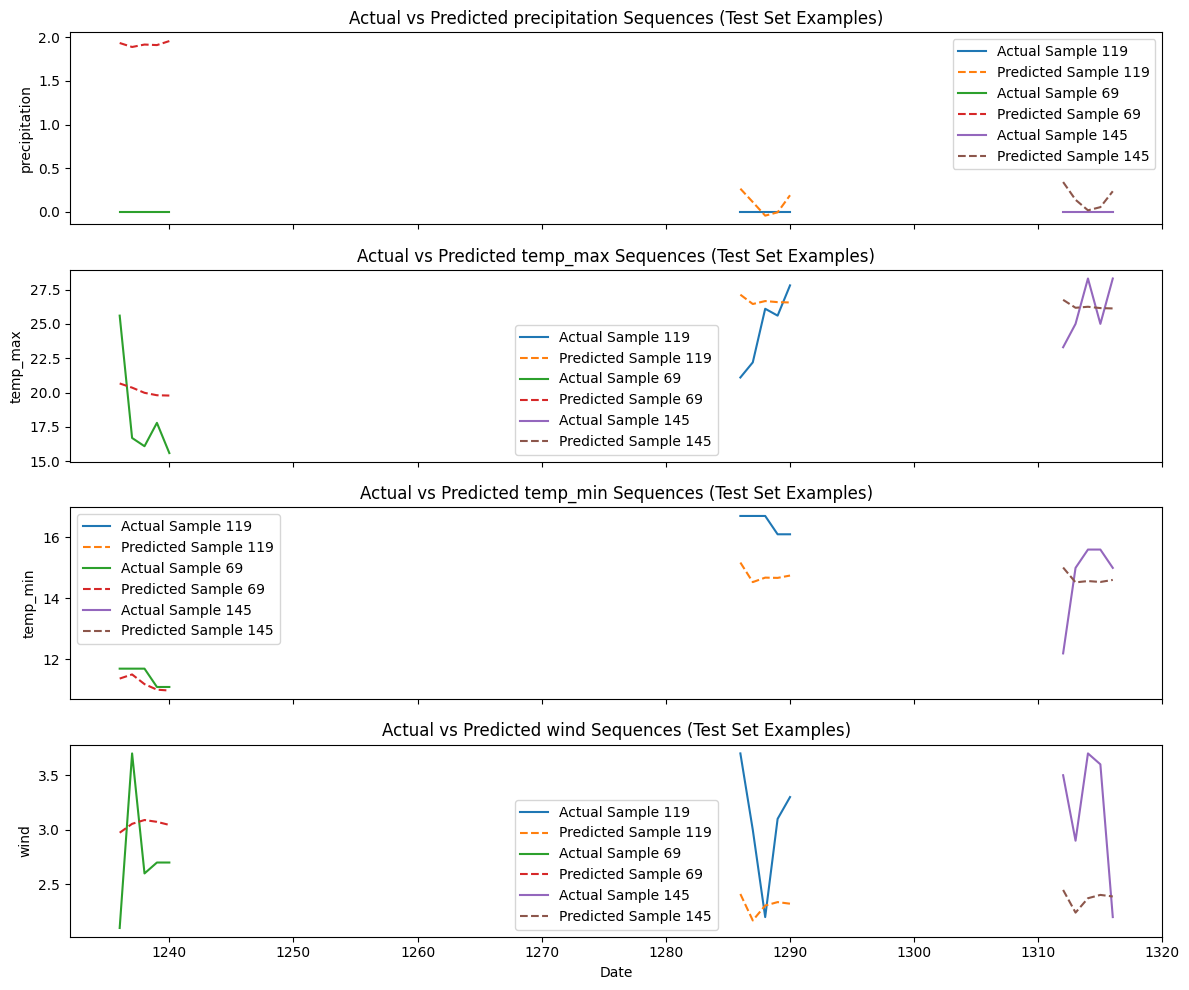

In [79]:
# Make predictions with Model 10
predictions10 = model10.predict(X_test_all_multi)

# Inverse scale the predictions and actual values for all 4 features
# The scaler was fitted on all 4 features.
# We can inverse transform the sequences directly as they have the same number of features as the original data

predictions10_original_scale = scaler.inverse_transform(predictions10.reshape(-1, len(features))).reshape(predictions10.shape)
y_test_all_multi_original_scale = scaler.inverse_transform(y_test_all_multi.reshape(-1, len(features))).reshape(y_test_all_multi.shape)


# Get the correct time index for the test set predictions
# For multi-step prediction, the index for a sequence of predictions starting at time t is from t+lookback_window to t+lookback_window+prediction_horizon-1
# We will plot the sequences aligned by their starting point (the first predicted step)
test_index_multi_step_all = df.index[train_size_all_multi + lookback_window:]

# Select a few example test samples to plot
num_examples_to_plot = 3
example_indices_all = np.random.choice(len(X_test_all_multi), num_examples_to_plot, replace=False)

# Plot actual vs predicted for all 4 features and selected examples using subplots
fig, axes = plt.subplots(len(features), 1, figsize=(12, 10), sharex=True)

for i, feature in enumerate(features):
    for j in example_indices_all:
        # Get the time index for the current example's prediction sequence
        current_test_index_all = df.index[train_size_all_multi + lookback_window + j : train_size_all_multi + lookback_window + j + prediction_horizon]

        axes[i].plot(current_test_index_all, y_test_all_multi_original_scale[j, :, i], label=f'Actual Sample {j}')
        axes[i].plot(current_test_index_all, predictions10_original_scale[j, :, i], label=f'Predicted Sample {j}', linestyle='--')

    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Actual vs Predicted {feature} Sequences (Test Set Examples)')
    axes[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Part 4: Model Performance Comparison

Objective: Systematically collect, compare, and analyze the evaluation metrics from the trained single-step and multi-step prediction models to understand their relative performance.

Instructions: Use pandas, matplotlib, and seaborn to create tables and visualizations. Ensure your analysis is clearly explained in markdown cells.

#### Collect Single-Step Model Metrics:
Gather the test evaluation metrics (MSE, MAE, RMSE) you obtained for each of the single-step prediction models (Model 1: Precipitation, Model 2: Temp Max, Model 3: Temp Min, Model 4: Wind, Model 5: All 4 Parameters). Organize these metrics into a pandas DataFrame.

In [80]:
# Collect metrics for single-step models

# Model 1 metrics (Precipitation) are in variables: loss, mae, rmse
# Model 5 metrics (All 4 Parameters) are in variables: loss5, mae5

# Calculate RMSE for Model 5
rmse5 = np.sqrt(loss5)

# Create a dictionary to hold the metrics
single_step_metrics = {
    'Model': ['Model 1 (Precipitation)', 'Model 5 (All 4 Parameters)'],
    'MSE': [loss, loss5],
    'MAE': [mae, mae5],
    'RMSE': [rmse, rmse5]
}

# Create a pandas DataFrame
single_step_metrics_df = pd.DataFrame(single_step_metrics)

print("Single-Step Model Evaluation Metrics:")
display(single_step_metrics_df)

Single-Step Model Evaluation Metrics:


,Model,MSE,MAE,RMSE
0,Model 1 (Precipitation),0.013932,0.063658,0.118035
1,Model 5 (All 4 Parameters),0.010595,0.068852,0.102932


#### Visualize Single-Step Model Metrics:
Create visualizations (e.g., bar plots) to compare the MSE, MAE, and RMSE across the different single-step models. Use subplots or separate plots for each metric for clarity.

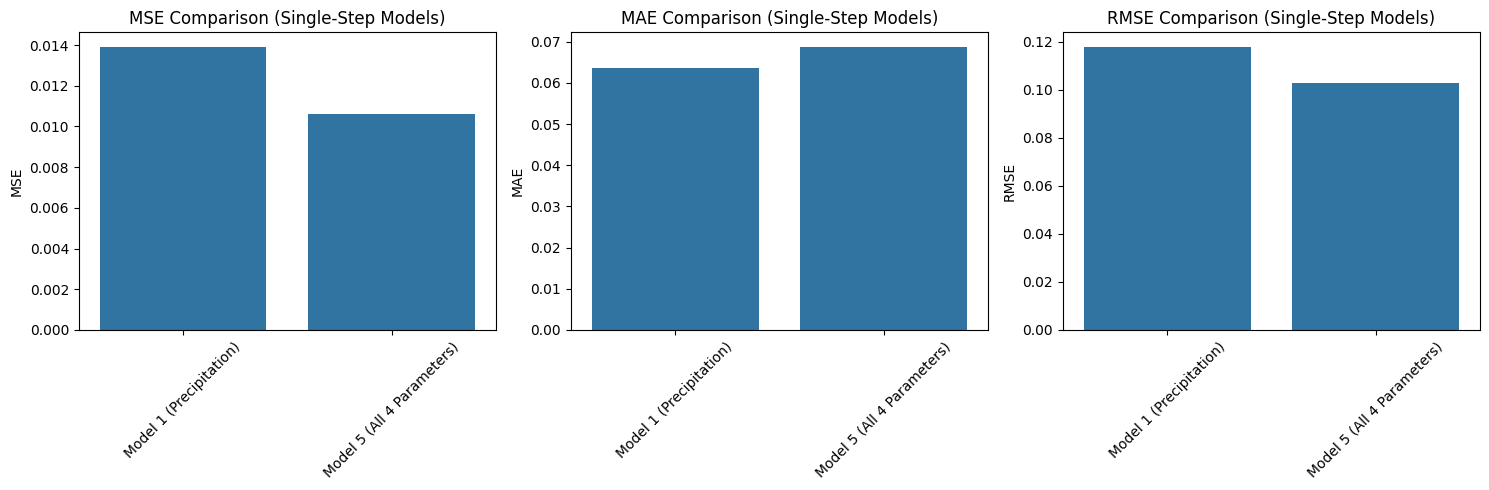

In [81]:
# Visualize Single-Step Model Metrics
metrics = ['MSE', 'MAE', 'RMSE']
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=single_step_metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} Comparison (Single-Step Models)')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Collect Multi-Step Model Overall Metrics:
Gather the overall test evaluation metrics (MSE, MAE, and calculate RMSE) you obtained for each of the multi-step prediction models (Model 6: Precipitation, Model 7: Temp Max, Model 8: Temp Min, Model 9: Wind, Model 10: All 4 Parameters). Organize these into a pandas DataFrame. Remember these metrics are averaged over the 5 predicted steps.

In [82]:
# Collect overall metrics for multi-step models

# Model 6 metrics (Precipitation) are in variables: loss6, mae6
# Model 7 metrics (Temp Max) are in variables: loss7, mae7
# Model 8 metrics (Temp Min) are in variables: loss8, mae8
# Model 9 metrics (Wind) are in variables: loss9, mae9
# Model 10 metrics (All 4 Parameters) are in variables: loss10, mae10

# Calculate RMSE for each model
rmse6 = np.sqrt(loss6)
rmse7 = np.sqrt(loss7)
rmse8 = np.sqrt(loss8)
rmse9 = np.sqrt(loss9)
rmse10 = np.sqrt(loss10)

# Create a dictionary to hold the metrics
multi_step_metrics = {
    'Model': ['Model 6 (Precipitation)', 'Model 7 (Temp Max)', 'Model 8 (Temp Min)', 'Model 9 (Wind)', 'Model 10 (All 4 Parameters)'],
    'MSE': [loss6, loss7, loss8, loss9, loss10],
    'MAE': [mae6, mae7, mae8, mae9, mae10],
    'RMSE': [rmse6, rmse7, rmse8, rmse9, rmse10]
}

# Create a pandas DataFrame
multi_step_metrics_df = pd.DataFrame(multi_step_metrics)

print("Multi-Step Model Overall Evaluation Metrics (Averaged over 5 steps):")
display(multi_step_metrics_df)

Multi-Step Model Overall Evaluation Metrics (Averaged over 5 steps):


,Model,MSE,MAE,RMSE
0,Model 6 (Precipitation),0.018435,0.064728,0.135776
1,Model 7 (Temp Max),0.009871,0.079967,0.099352
2,Model 8 (Temp Min),0.008687,0.075244,0.093202
3,Model 9 (Wind),0.019699,0.106165,0.140353
4,Model 10 (All 4 Parameters),0.013779,0.079714,0.117386


#### Visualize Multi-Step Model Overall Metrics:
Create visualizations (e.g., bar plots) to compare the overall MSE, MAE, and RMSE across the different multi-step models.

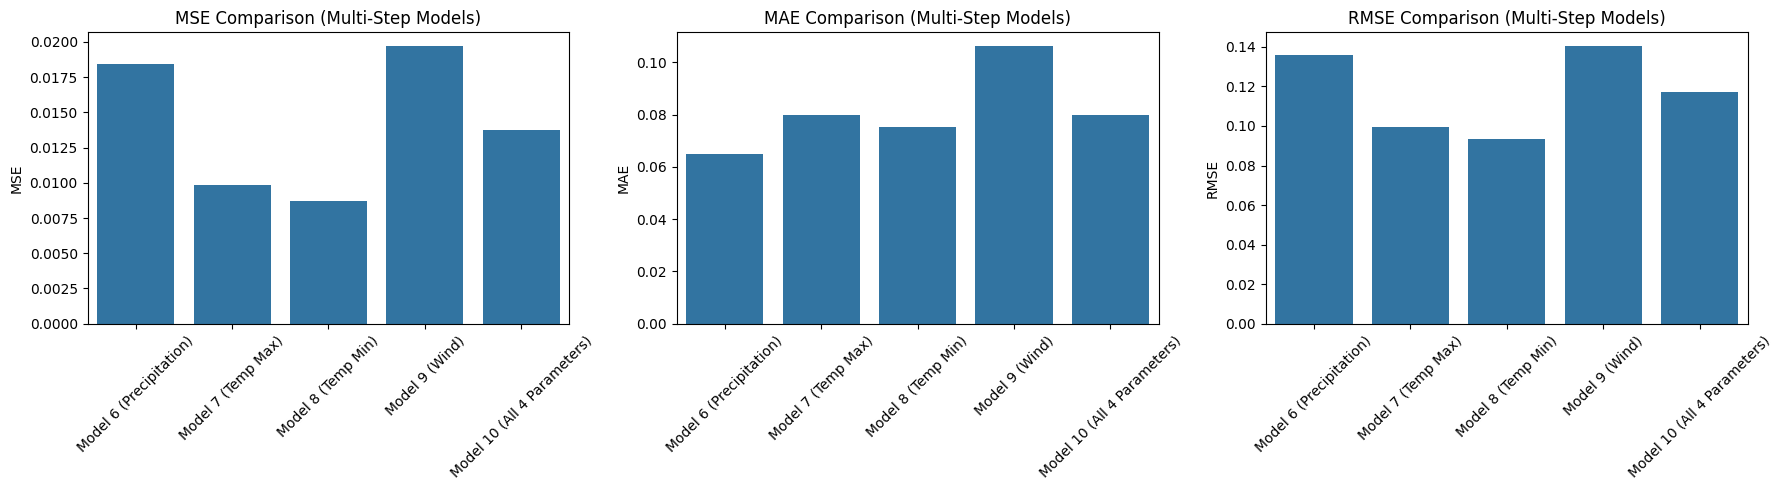

In [83]:
# Visualize Multi-Step Model Overall Metrics
metrics = ['MSE', 'MAE', 'RMSE']
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=multi_step_metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} Comparison (Multi-Step Models)')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()